In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 14.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Check if YOLOv8 is installed correctly
YOLO('yolov8n.pt').info()


100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]


YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Optionally, copy the dataset to your working directory
!unzip /content/drive/MyDrive/dataset.zip -d /content/dataset


Mounted at /content/drive
Archive:  /content/drive/MyDrive/dataset.zip
   creating: /content/dataset/dataset/labels/test/
   creating: /content/dataset/dataset/labels/train/
  inflating: /content/dataset/dataset/images/train/IMG_6366.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6373.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6363.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6361.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6371.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6374.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6365.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6376.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6367.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6364.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6369.jpg  
  inflating: /content/dataset/dataset/images/train/IMG_6362.jpg  
  inflating: /content/dataset/data

In [ ]:
import os
import json

# Function to convert polygons to bounding boxes
def polygon_to_bbox(points):
    x_coordinates = [point[0] for point in points]
    y_coordinates = [point[1] for point in points]
    x_min = min(x_coordinates)
    x_max = max(x_coordinates)
    y_min = min(y_coordinates)
    y_max = max(y_coordinates)
    return [x_min, y_min, x_max - x_min, y_max - y_min]

# Paths
json_dir_train = '/content/dataset/dataset/labels_json/train'  # Path to your labelme JSON files
json_dir_test = '/content/dataset/dataset/labels_json/test'  # Path to your labelme JSON files
output_dir_train = '/content/dataset/dataset/labels/train'  # Path where you want to save YOLO labels
output_dir_test = '/content/dataset/dataset/labels/test'  # Path where you want to save YOLO labels
os.makedirs(output_dir_train, exist_ok=True)

# Mapping class names to class IDs (YOLO expects class IDs starting from 0)
class_name_to_id = {"Initial": 0, "Middle": 1, "Harvest": 2}  # Update this dictionary based on your classes

# Loop through each JSON file train
for json_file in os.listdir(json_dir_train):
    if json_file.endswith('.json'):
        with open(os.path.join(json_dir_train, json_file), 'r') as f:
            data = json.load(f)

        img_height = data['imageHeight']
        img_width = data['imageWidth']

        yolo_lines = []
        for shape in data['shapes']:
            label = shape['label']
            points = shape['points']
            bbox = polygon_to_bbox(points)

            # Convert bbox to YOLO format
            x_center = (bbox[0] + bbox[2] / 2) / img_width
            y_center = (bbox[1] + bbox[3] / 2) / img_height
            width = bbox[2] / img_width
            height = bbox[3] / img_height

            class_id = class_name_to_id[label]

            yolo_lines.append(f"{class_id} {x_center} {y_center} {width} {height}\n")

        # Save the YOLO format annotation
        output_file = os.path.join(output_dir_train, os.path.splitext(json_file)[0] + '.txt')
        with open(output_file, 'w') as f:
            f.writelines(yolo_lines)

os.makedirs(output_dir_test, exist_ok=True)
# Loop through each JSON file test
for json_file in os.listdir(json_dir_test):
    if json_file.endswith('.json'):
        with open(os.path.join(json_dir_test, json_file), 'r') as f:
            data = json.load(f)

        img_height = data['imageHeight']
        img_width = data['imageWidth']

        yolo_lines = []
        for shape in data['shapes']:
            label = shape['label']
            points = shape['points']
            bbox = polygon_to_bbox(points)

            # Convert bbox to YOLO format
            x_center = (bbox[0] + bbox[2] / 2) / img_width
            y_center = (bbox[1] + bbox[3] / 2) / img_height
            width = bbox[2] / img_width
            height = bbox[3] / img_height

            class_id = class_name_to_id[label]

            yolo_lines.append(f"{class_id} {x_center} {y_center} {width} {height}\n")

        # Save the YOLO format annotation
        output_file = os.path.join(output_dir_test, os.path.splitext(json_file)[0] + '.txt')
        with open(output_file, 'w') as f:
            f.writelines(yolo_lines)



In [ ]:
yaml_content = """
train: /content/dataset/dataset/images/train
val: /content/dataset/dataset/images/test
nc: 3
name:
  -Initial
  -Middle
  -Harvest
"""



# 将YAML内容写入文件
with open('data.yaml', 'w') as file:
    file.write(yaml_content)


In [47]:
import matplotlib.pyplot as plt

model = YOLO('yolov8n.pt')  # Load a pretrained YOLOv8 model

# Train the model
 # Example: Training with early stopping, increased weight decay, and data augmentation
results =model.train(
    data='/content/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    patience=5,  # Early stopping after 5 epochs of no improvement
    weight_decay=0.001,  # Increase weight decay for regularization
    augment=True  # Enable/extend data augmentation
)



Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /content/dataset/dataset/labels/train.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/dataset/labels/test.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.46G      1.366      4.025      1.346        202        640: 100%|██████████| 5/5 [00:11<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all        105       1315    0.00188     0.0399    0.00126   0.000584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.32G      1.151      3.692      1.213        224        640: 100%|██████████| 5/5 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        105       1315    0.00386     0.0845     0.0117    0.00613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.44G      1.135      3.134      1.085        202        640: 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.23s/it]

                   all        105       1315     0.0124      0.303      0.087     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.47G      1.117       2.51      1.037        178        640: 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.49s/it]

                   all        105       1315     0.0217      0.503       0.19      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.46G      1.141      2.251      1.035        117        640: 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.89s/it]


                   all        105       1315     0.0337      0.805      0.317      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.38G      1.037      1.816     0.9971        139        640: 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.50s/it]


                   all        105       1315     0.0328      0.771      0.371      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.38G     0.9779      1.544     0.9913        168        640: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.72s/it]

                   all        105       1315      0.509      0.155      0.313      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G     0.9661      1.422     0.9979        162        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.35s/it]


                   all        105       1315      0.577      0.203      0.347      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.56G      0.941      1.325     0.9911        217        640: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.04s/it]

                   all        105       1315      0.884      0.149      0.443      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.41G     0.8512      1.195     0.9627        205        640: 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.32s/it]

                   all        105       1315      0.825       0.28      0.493      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.44G     0.8895      1.134      0.953        184        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.33s/it]

                   all        105       1315       0.76      0.419      0.559      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.54G     0.8717       1.08     0.9612        216        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.70s/it]

                   all        105       1315      0.695      0.465      0.572      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.53G     0.8311      1.024     0.9355        296        640: 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.46s/it]


                   all        105       1315      0.676      0.495      0.581      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.47G      0.828      1.028     0.9424        150        640: 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.84s/it]

                   all        105       1315      0.638      0.553      0.584      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.44G     0.7583     0.9611     0.9388        161        640: 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.20s/it]


                   all        105       1315      0.564      0.551      0.502       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.54G     0.7765     0.9393     0.9364        135        640: 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.98s/it]


                   all        105       1315      0.549      0.559      0.505      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.38G      0.797     0.9279     0.9366        186        640: 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.25s/it]


                   all        105       1315      0.633      0.615      0.609      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.38G     0.7238      0.891     0.9253        159        640: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.66s/it]

                   all        105       1315      0.633      0.601      0.609      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.36G     0.7658     0.9319     0.9203        208        640: 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.26s/it]

                   all        105       1315      0.632       0.61      0.591      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.58G     0.7726     0.9504      0.939        136        640: 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.27s/it]


                   all        105       1315      0.725      0.686       0.71      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.48G     0.7541     0.8562     0.9397        147        640: 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.01s/it]

                   all        105       1315      0.699      0.722      0.729      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.42G      0.762     0.8415     0.9151        287        640: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.25s/it]

                   all        105       1315      0.712      0.716      0.733      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.51G     0.7534     0.8392      0.917        204        640: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.73s/it]

                   all        105       1315      0.669      0.721       0.71      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.47G     0.7092     0.8082     0.9103        220        640: 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.40s/it]

                   all        105       1315      0.726      0.707      0.741      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.42G     0.7067     0.8151     0.9222        159        640: 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.68s/it]

                   all        105       1315      0.745      0.716      0.757      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.47G     0.6933     0.7812      0.909        205        640: 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.25s/it]


                   all        105       1315      0.759      0.719      0.766      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.56G     0.6851     0.7705     0.8984        174        640: 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.92s/it]


                   all        105       1315      0.776      0.722      0.775      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.38G      0.657     0.7412     0.8907        142        640: 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.26s/it]

                   all        105       1315      0.777      0.708      0.766      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.52G     0.6766     0.7488     0.9012        114        640: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.60s/it]


                   all        105       1315      0.763      0.709      0.761      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.32G     0.6883     0.7434      0.898        208        640: 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.45s/it]


                   all        105       1315      0.763      0.723      0.763      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.36G     0.6251     0.6968     0.8901        124        640: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.28s/it]


                   all        105       1315      0.774      0.713      0.759      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.4G     0.6388     0.7098      0.899        169        640: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.16s/it]

                   all        105       1315      0.789      0.716       0.76        0.6
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 27, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



32 epochs completed in 0.150 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:19<00:00,  4.75s/it]


                   all        105       1315      0.753      0.713       0.76       0.59
               class_0         95        569      0.739      0.707      0.756      0.543
               class_1         77        190      0.652      0.592      0.599      0.473
               class_2        105        556      0.868      0.841      0.924      0.754
Speed: 0.4ms preprocess, 25.0ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train10


['                  epoch', '         train/box_loss', '         train/cls_loss', '         train/dfl_loss', '   metrics/precision(B)', '      metrics/recall(B)', '       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '           val/box_loss', '           val/cls_loss', '           val/dfl_loss', '                 lr/pg0', '                 lr/pg1', '                 lr/pg2']


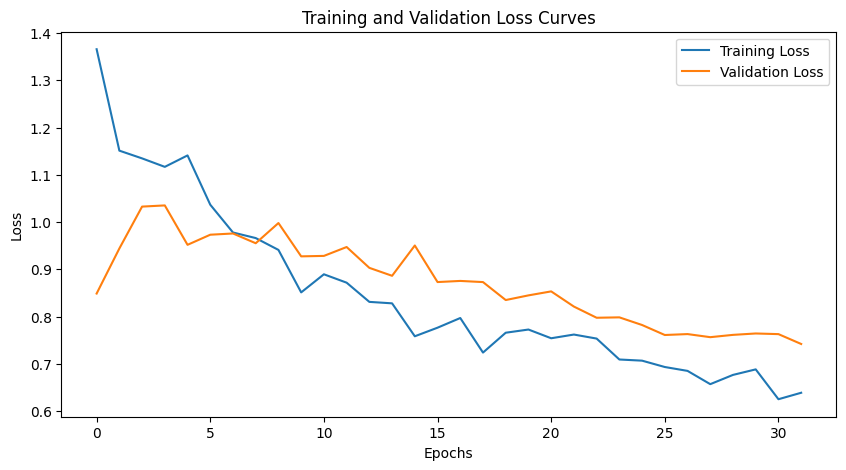

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming results are saved in a directory like 'runs/train/exp'
results_file = '/content/runs/detect/train10/results.csv'


# Load the results from the CSV file
results_df = pd.read_csv(results_file)
print(results_df.columns.tolist()) #Display the column names
# Trimmed column names for easier access
train_loss = results_df['         train/box_loss']
val_loss = results_df['           val/box_loss']

# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

